In [7]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from lsh import LSH
from IPython.display import Image
from sklearn.neighbors import NearestNeighbors
import time

In [18]:
t=56
base = np.load("./descripteur_img.npy")
base_name = np.load("./descripteur_img_filename.npy")
queries = np.load("./descripteur_queries.npy")
queries_name = np.load("./descripteur_queries_filename.npy")
query=queries[t]
lsh = LSH(nb_projections=10, nb_tables=2, w=1)
lsh.fit(base)
lsh_result = lsh.kneighbors(query, k=1)
lsh_index = lsh_result[1][0]
print(lsh_result, lsh_index)

([0.6043199], array([5331]), 7991) 5331


In [19]:
bf = NearestNeighbors(n_neighbors=1, algorithm='brute')
bf.fit(base)
ground_results = bf.kneighbors(queries, n_neighbors=1)
ground_indices = ground_results[1]
print(ground_indices)

[[2848]
 [5542]
 [2204]
 [7320]
 [ 457]
 [6810]
 [6332]
 [3115]
 [1592]
 [5448]
 [3461]
 [ 115]
 [7628]
 [4872]
 [7230]
 [2850]
 [4133]
 [5088]
 [5577]
 [2653]
 [2292]
 [5080]
 [5419]
 [1759]
 [1751]
 [3907]
 [2767]
 [2756]
 [1282]
 [ 361]
 [4424]
 [1198]
 [3308]
 [4874]
 [6571]
 [7412]
 [5272]
 [3978]
 [7183]
 [ 556]
 [2043]
 [2862]
 [7408]
 [3563]
 [5764]
 [6443]
 [6710]
 [5287]
 [6549]
 [4681]
 [7353]
 [4680]
 [3483]
 [5304]
 [  43]
 [6789]
 [5331]
 [1616]
 [ 192]
 [4146]
 [1805]
 [5277]
 [6813]
 [5041]
 [3623]
 [4963]
 [4475]
 [7737]
 [5079]
 [2590]
 [1181]
 [3945]
 [ 431]
 [7216]
 [2563]
 [1848]
 [1333]
 [ 890]
 [6917]
 [4248]
 [4832]
 [5929]
 [4862]
 [6172]
 [ 456]
 [4277]
 [6469]
 [7890]
 [7349]
 [ 130]
 [ 901]
 [2881]
 [7516]
 [4343]
 [1820]
 [ 712]
 [7804]
 [5350]
 [3986]
 [1666]]


Valeur de W:0.250000
precision: 0.870000
inspected data: 5516.720000
temps des recherches = 2.045498
Valeur de W:0.500000
precision: 1.000000
inspected data: 7965.730000
temps des recherches = 3.004081
Valeur de W:0.750000
precision: 1.000000
inspected data: 7991.000000
temps des recherches = 2.952968


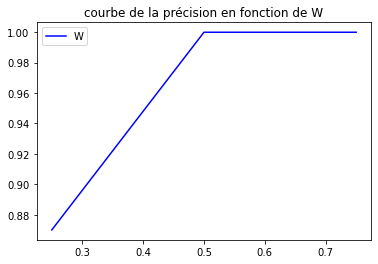

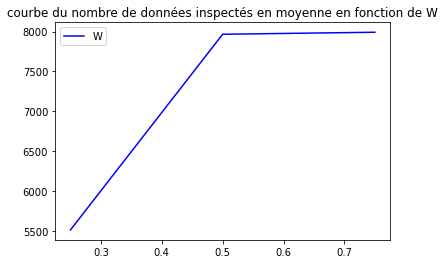

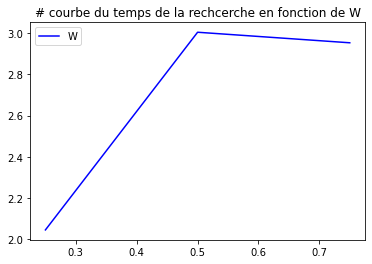

In [20]:
# Influence du facteur W

max = 4
w_values = [0.25 * i for i in range(1, max)]
precisions = []
inspected_avgs = []
times = []
for w in w_values:
    to = time.time()
    print("Valeur de W:%f" % w)
    lsh = LSH(nb_projections=10, nb_tables=2, w=w)
    lsh.fit(base)
    match_count = 0
    inspected_count = 0
    for i, query in enumerate(queries):
        lsh_result = lsh.kneighbors(query, k=1)
        lsh_index = lsh_result[1][0]
        match_count += 1 if lsh_index == ground_indices[i] else 0
        inspected_count += lsh_result[2]

    precision = match_count / len(queries)
    precisions.append(precision)
    print("precision: %f" % precision)

    inspected_avg = inspected_count / len(queries)
    inspected_avgs.append(inspected_avg)
    times.append(time.time() - to)
    print("inspected data: %f" % inspected_avg)
    print("temps des recherches = %f" %(time.time() - to))

# courbe de la précision en fonction de W
plt.plot(w_values, precisions, label="W", color="blue")
plt.legend()
plt.title("courbe de la précision en fonction de W")
plt.show()

# courbe du nombre de données inspectés en moyenne en fonction de W
plt.plot(w_values, inspected_avgs, label="W", color="blue")
plt.title("courbe du nombre de données inspectés en moyenne en fonction de W")
plt.legend()
plt.show()

# courbe du temps de la rechcerche en fonction de W
plt.plot(w_values, times, label="W", color="blue")
plt.title("# courbe du temps de la rechcerche en fonction de W")
plt.legend()
plt.show()

Nombre de tables:1
precision: 0.770000
average ratio : 25.904514
temps des recherches = 1.635491
Nombre de tables:2
precision: 1.000000
average ratio : 50.500000
temps des recherches = 3.263125
Nombre de tables:3
precision: 1.000000
average ratio : 50.500000
temps des recherches = 3.356724
Nombre de tables:4
precision: 1.000000
average ratio : 50.500000
temps des recherches = 3.527952
Nombre de tables:5
precision: 1.000000
average ratio : 50.433420
temps des recherches = 3.504117
Nombre de tables:6
precision: 1.000000
average ratio : 50.500000
temps des recherches = 3.603248


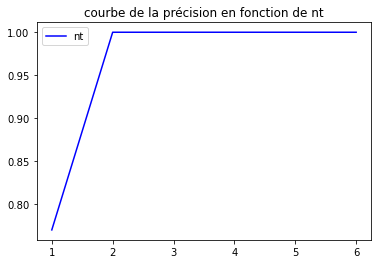

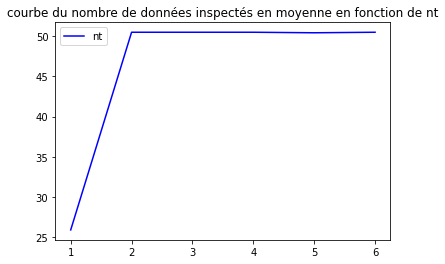

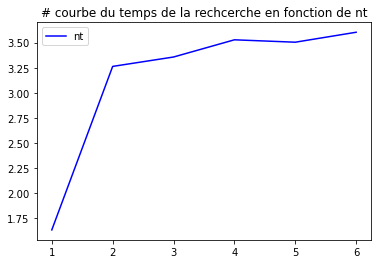

In [21]:
# Influence du nombre de table de hachage
precisions = []
ratio_avgs = []
times = []
data_size = len(base)
for nt in range(1,7):
    to = time.time()
    print("Nombre de tables:%d" % nt)
    lsh = LSH(nb_projections=10, nb_tables=nt, w=1.0)
    lsh.fit(base)
    match_count = 0
    inspected_count = 0
    ratio_sum = 0
    for i, query in enumerate(queries):
        lsh_result = lsh.kneighbors(query, k=1)
        lsh_index = lsh_result[1][0]
        match_count += 1 if lsh_index == ground_indices[i] else 0
        inspected_count += lsh_result[2]
        ratio = inspected_count / data_size
        ratio_sum += ratio

    precision = match_count / len(queries)
    precisions.append(precision)
    print("precision: %f" % precision)

    ratio_avg = ratio_sum / len(queries)
    ratio_avgs.append(ratio_avg)
    print("average ratio : %f" % ratio_avg)
    
    
    times.append(time.time() - to)
    print("temps des recherches = %f" %(time.time() - to))
    
# courbe de la précision en fonction de nt
plt.plot([1,2,3,4,5,6], precisions, label="nt", color="blue")
plt.legend()
plt.title("courbe de la précision en fonction de nt")
plt.show()

# courbe du nombre de données inspectés en moyenne en fonction de nt
plt.plot([1,2,3,4,5,6], ratio_avgs, label="nt", color="blue")
plt.title("courbe du nombre de données inspectés en moyenne en fonction de nt")
plt.legend()
plt.show()

# courbe du temps de la rechcerche en fonction de W
plt.plot([1,2,3,4,5,6], times, label="nt", color="blue")
plt.title("# courbe du temps de la rechcerche en fonction de nt")
plt.legend()
plt.show()